# RNN on airlines dataset

In [1]:
from pandas import read_csv
import numpy as np

In [2]:
df=read_csv("international-airline-passengers (1).csv",usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [4]:
values=df.values.astype('float32')
values.shape

(144, 1)

In [5]:
train_size=int((values.shape[0]* 0.67))
test_size=values.shape[0]-train_size
train=values[0:train_size]
test=values[train_size:]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [7]:

def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    
    return np.array(dataX), np.array(dataY)
        

In [8]:
look_back=12
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [9]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX =np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

In [10]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

/Users/shefalibansal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')
model.fit(trainX,trainY,epochs=10,batch_size=1)


Epoch 1/10
84/84 [==============================] - 1s 10ms/step - loss: 0.0276
Epoch 2/10
84/84 [==============================] - 1s 9ms/step - loss: 0.0148
Epoch 3/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0117
Epoch 4/10
84/84 [==============================] - 1s 9ms/step - loss: 0.0102
Epoch 5/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0096
Epoch 6/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0091
Epoch 7/10
84/84 [==============================] - 1s 11ms/step - loss: 0.0087
Epoch 8/10
84/84 [==============================] - 1s 11ms/step - loss: 0.0076
Epoch 9/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0076
Epoch 10/10
84/84 [==============================] - 1s 9ms/step - loss: 0.0075


In [12]:
testPredict=model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()
trainPredict=model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue=scaler.inverse_transform([trainY]).ravel()
testPredict.shape,testTrue.shape

((36,), (36,))

In [13]:
from matplotlib import pyplot as plt


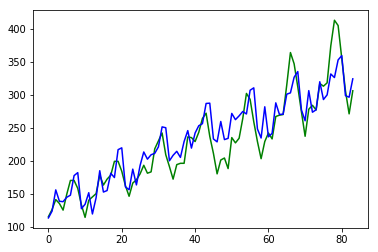

In [14]:
plt.plot(trainTrue,c='g')
plt.plot(trainPredict,c='b')
plt.show()

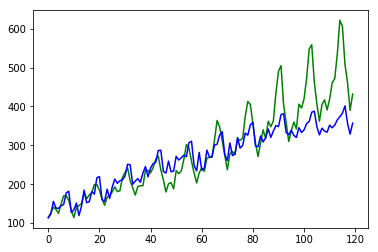

In [15]:
combinedPredicted=np.concatenate((trainPredict,testPredict))
combinedTrue=np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue,c='g')
plt.plot(combinedPredicted,c='b')
plt.show()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
